In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random as rn
from scipy import stats

from sklearn.metrics import accuracy_score, precision_score, recall_score

In [2]:
RANDOM_SEED = 42
rn.seed(RANDOM_SEED)

### Load Data

1. Has some missing values, especially in column 'MIS_Status'

In [3]:
df = pd.concat( pd.read_csv('SBAnational.csv', chunksize = 1000) )

In [4]:
df.columns

Index(['LoanNr_ChkDgt', 'Name', 'City', 'State', 'Zip', 'Bank', 'BankState',
       'NAICS', 'ApprovalDate', 'ApprovalFY', 'Term', 'NoEmp', 'NewExist',
       'CreateJob', 'RetainedJob', 'FranchiseCode', 'UrbanRural', 'RevLineCr',
       'LowDoc', 'ChgOffDate', 'DisbursementDate', 'DisbursementGross',
       'BalanceGross', 'MIS_Status', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv'],
      dtype='object')

In [5]:
df.isna().sum()

LoanNr_ChkDgt             0
Name                     14
City                     30
State                    14
Zip                       0
Bank                   1559
BankState              1566
NAICS                     0
ApprovalDate              0
ApprovalFY                0
Term                      0
NoEmp                     0
NewExist                136
CreateJob                 0
RetainedJob               0
FranchiseCode             0
UrbanRural                0
RevLineCr              4528
LowDoc                 2582
ChgOffDate           736465
DisbursementDate       2368
DisbursementGross         0
BalanceGross              0
MIS_Status             1997
ChgOffPrinGr              0
GrAppv                    0
SBA_Appv                  0
dtype: int64

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
LoanNr_ChkDgt,899164.0,4.772612e+09,2.538175e+09,1.000014e+09,2.589758e+09,4.361439e+09,6.904627e+09,9.996003e+09
Zip,899164.0,5.380439e+04,3.118416e+04,0.000000e+00,2.758700e+04,5.541000e+04,8.370400e+04,9.999900e+04
NAICS,899164.0,3.986610e+05,2.633183e+05,0.000000e+00,2.352100e+05,4.453100e+05,5.617300e+05,9.281200e+05
Term,899164.0,1.107731e+02,7.885731e+01,0.000000e+00,6.000000e+01,8.400000e+01,1.200000e+02,5.690000e+02
NoEmp,899164.0,1.141135e+01,7.410820e+01,0.000000e+00,2.000000e+00,4.000000e+00,1.000000e+01,9.999000e+03
NewExist,899028.0,1.280404e+00,4.517500e-01,0.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00
CreateJob,899164.0,8.430376e+00,2.366882e+02,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,8.800000e+03
RetainedJob,899164.0,1.079726e+01,2.371206e+02,0.000000e+00,0.000000e+00,1.000000e+00,4.000000e+00,9.500000e+03
FranchiseCode,899164.0,2.753726e+03,1.275802e+04,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,9.999900e+04
UrbanRural,899164.0,7.577483e-01,6.464360e-01,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00


In [7]:
for col in df.columns:
    print(f'{col} -> {df[col].unique()}')
    print('='*50)

LoanNr_ChkDgt -> [1000014003 1000024006 1000034009 ... 9995613003 9995973006 9996003010]
Name -> ['ABC HOBBYCRAFT' 'LANDMARK BAR & GRILLE (THE)' 'WHITLOCK DDS, TODD M.'
 ... 'RADCO MANUFACTURING CO.,INC.' 'MARUTAMA HAWAII, INC.'
 'PACIFIC TRADEWINDS FAN & LIGHT']
City -> ['EVANSVILLE' 'NEW PARIS' 'BLOOMINGTON' ... 'MURFRECSBORO' 'E WENALCHEE'
 'SO. OZONE PARK']
State -> ['IN' 'OK' 'FL' 'CT' 'NJ' 'NC' 'IL' 'RI' 'TX' 'VA' 'TN' 'AR' 'MN' 'MO'
 'MA' 'CA' 'SC' 'LA' 'IA' 'OH' 'KY' 'MS' 'NY' 'MD' 'PA' 'OR' 'ME' 'KS'
 'MI' 'AK' 'WA' 'CO' 'MT' 'WY' 'UT' 'NH' 'WV' 'ID' 'AZ' 'NV' 'WI' 'NM'
 'GA' 'ND' 'VT' 'AL' 'NE' 'SD' 'HI' 'DE' 'DC' nan]
Zip -> [47711 46526 47401 ... 70036 66549 26134]
Bank -> ['FIFTH THIRD BANK' '1ST SOURCE BANK' 'GRANT COUNTY STATE BANK' ...
 'FIRST ILLINOIS BANK' 'COLORADO COMMUNITY FIRST STATE' 'DEPCO']
BankState -> ['OH' 'IN' 'OK' 'FL' 'DE' 'SD' 'AL' 'CT' 'GA' 'OR' 'MN' 'RI' 'NC' 'TX'
 'MD' 'NY' 'TN' 'SC' 'MS' 'MA' 'LA' 'IA' 'VA' 'CA' 'IL' 'KY' 'PA' 'MO'
 'WA' 'MI' 'UT' 'K

LowDoc -> ['Y' 'N' 'C' '1' nan 'S' 'R' 'A' '0']
ChgOffDate -> [nan '24-Jun-91' '18-Apr-02' ... '25-Dec-02' '11-Jul-00' '9-Oct-98']
DisbursementDate -> ['28-Feb-99' '31-May-97' '31-Dec-97' ... '21-Jun-97' '8-May-02'
 '25-Oct-97']
DisbursementGross -> ['$60,000.00 ' '$40,000.00 ' '$287,000.00 ' ... '$377,446.00 '
 '$123,770.00 ' '$1,086,300.00 ']
BalanceGross -> ['$0.00 ' '$12,750.00 ' '$827,875.00 ' '$25,000.00 ' '$37,100.00 '
 '$43,127.00 ' '$84,617.00 ' '$1,760.00 ' '$115,820.00 ' '$996,262.00 '
 '$395,476.00 ' '$41,509.00 ' '$600.00 ' '$9,111.00 ' '$96,908.00 ']
MIS_Status -> ['P I F' 'CHGOFF' nan]
ChgOffPrinGr -> ['$0.00 ' '$208,959.00 ' '$14,084.00 ' ... '$109,860.00 ' '$140,812.00 '
 '$124,847.00 ']
GrAppv -> ['$60,000.00 ' '$40,000.00 ' '$287,000.00 ' ... '$12,480.00 '
 '$62,425.00 ' '$1,086,300.00 ']
SBA_Appv -> ['$48,000.00 ' '$32,000.00 ' '$215,250.00 ' ... '$9,984.00 ' '$34,246.00 '
 '$715,674.00 ']


In [8]:
df.dropna(subset=['MIS_Status'], inplace=True)

def remove_spaces(text):
    return text.replace(' ', '')

df['MIS_Status'] = df['MIS_Status'].apply(remove_spaces)

df['MIS_Status'].unique()

array(['PIF', 'CHGOFF'], dtype=object)

### Convert dates into Pandas date series

In [9]:
df['OutPut'] = df['MIS_Status'].map({'PIF': 1, 'CHGOFF': 0})

In [10]:
text_col = ['Name','City','State','Bank','BankState','NAICS']
date_col = ['ApprovalDate','DisbursementDate']
numeric_col = ['Term','NoEmp','CreateJob','RetainedJob','DisbursementGross','BalanceGross','ChgOffPrinGr','GrAppv','SBA_Appv']



In [11]:
for col in date_col:
    df[col] = pd.to_datetime(df[col], format='%d-%b-%y')

In [12]:
for col in numeric_col:
    if df[col].dtype == 'object':
        df[col] = df[col].str.replace('[^\d.]', '', regex=True).astype(float)

In [13]:
df[numeric_col].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Term,897167.0,110.848592,78.900862,0.0,60.0,84.0,120.0,569.0
NoEmp,897167.0,11.412562,73.793775,0.0,2.0,4.0,10.0,9999.0
CreateJob,897167.0,8.444305,236.950249,0.0,0.0,0.0,1.0,8800.0
RetainedJob,897167.0,10.807308,237.382398,0.0,0.0,1.0,4.0,9500.0
DisbursementGross,897167.0,201598.034681,287806.620570,4000.0,42492.0,100000.0,239000.0,11446325.0
BalanceGross,897167.0,2.996003,1443.766066,0.0,0.0,0.0,0.0,996262.0
ChgOffPrinGr,897167.0,13527.211002,65209.860188,0.0,0.0,0.0,0.0,3512596.0
GrAppv,897167.0,193059.516894,283433.114425,1000.0,35000.0,90000.0,225000.0,5472000.0
SBA_Appv,897167.0,149780.698635,228559.979775,500.0,21250.0,62050.0,175000.0,5472000.0


In [14]:
df['IsDisburesedMore'] = df['DisbursementGross'] > df['SBA_Appv']
df['IsDisburesedMore'] = df['IsDisburesedMore'].map({True: 1, False: 0})
df_test = df.sample(frac = 0.25, random_state = RANDOM_SEED)

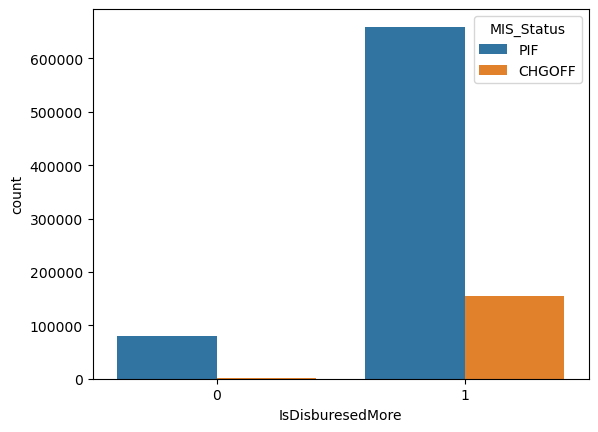

In [15]:
sns.countplot(data=df, x='IsDisburesedMore', hue='MIS_Status')
plt.show()

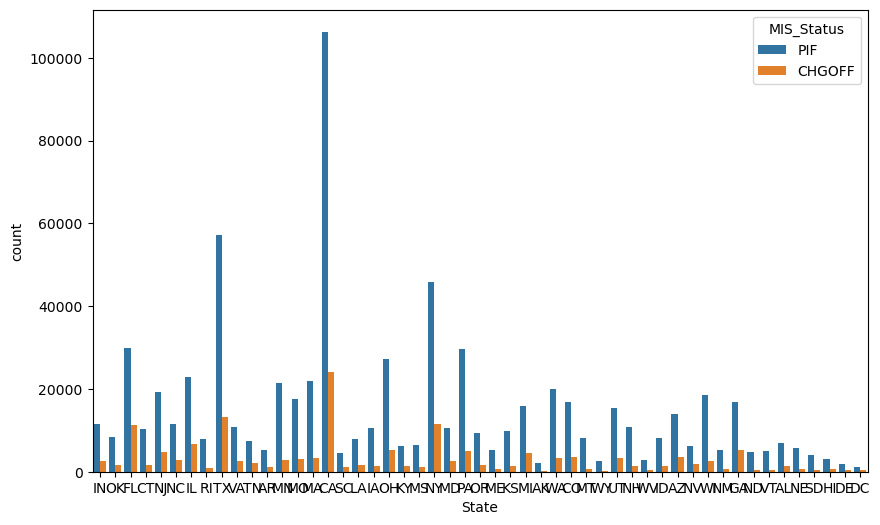

In [16]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='State', hue='MIS_Status')
plt.show()

In [17]:
df['NAICS'] = df['NAICS'] // 10000

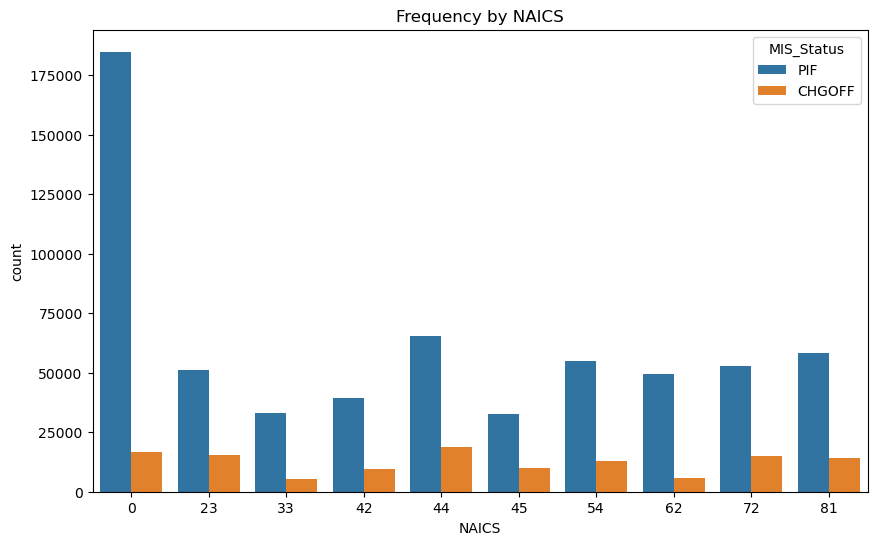

In [18]:
naics_counts = df['NAICS'].value_counts()
top_10_naics = naics_counts.head(10)

plt.figure(figsize=(10, 6))
sns.countplot(data=df[df['NAICS'].isin(top_10_naics.index)], x='NAICS', hue='MIS_Status')
plt.title('Frequency by NAICS')
plt.show()

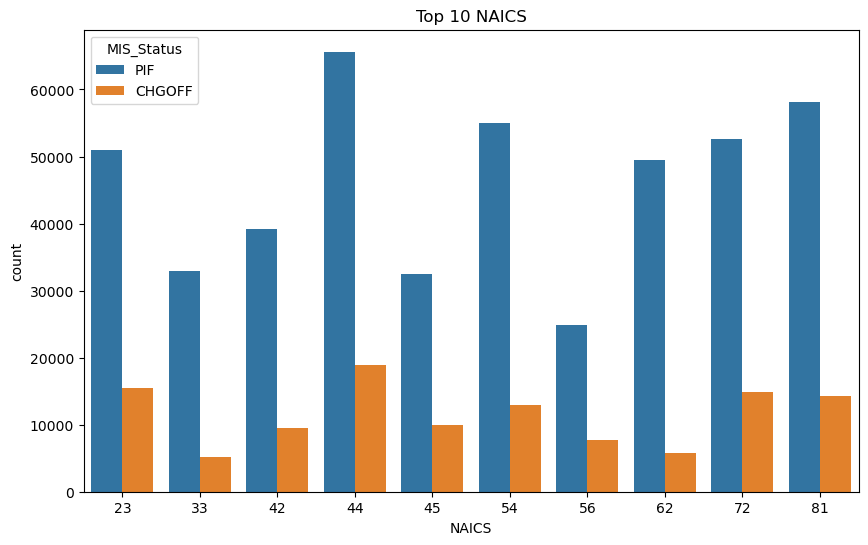

In [19]:
# After dropping 0 values
df = df[df['NAICS']>0]
naics_counts = df['NAICS'].value_counts()
top_10_naics = naics_counts.head(10)

plt.figure(figsize=(10, 6))
sns.countplot(data=df[df['NAICS'].isin(top_10_naics.index)], x='NAICS', hue='MIS_Status')
plt.title('Top 10 NAICS')
plt.show()

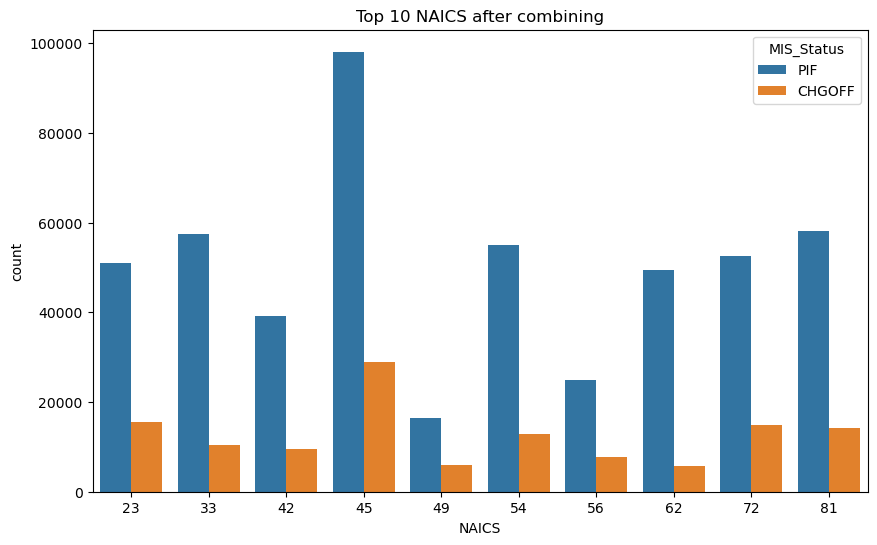

In [20]:
# After combining the NAICS
df.loc[df['NAICS'].between(31, 33), 'NAICS'] = 33
df.loc[df['NAICS'].between(44, 45), 'NAICS'] = 45
df.loc[df['NAICS'].between(48, 49), 'NAICS'] = 49
naics_counts = df['NAICS'].value_counts()
top_10_naics = naics_counts.head(10)

plt.figure(figsize=(10, 6))
sns.countplot(data=df[df['NAICS'].isin(top_10_naics.index)], x='NAICS', hue='MIS_Status')
plt.title('Top 10 NAICS after combining')
plt.show()

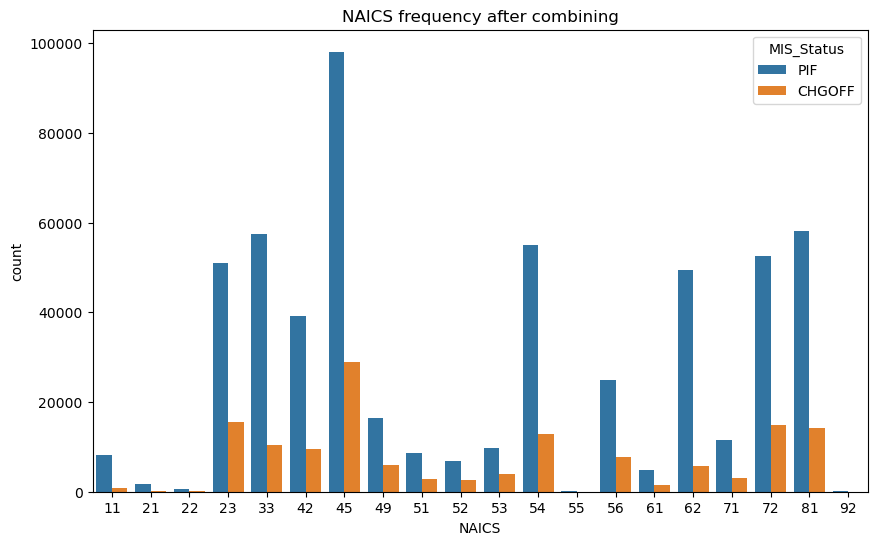

In [21]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='NAICS', hue='MIS_Status')
plt.title('NAICS frequency after combining')
plt.show()

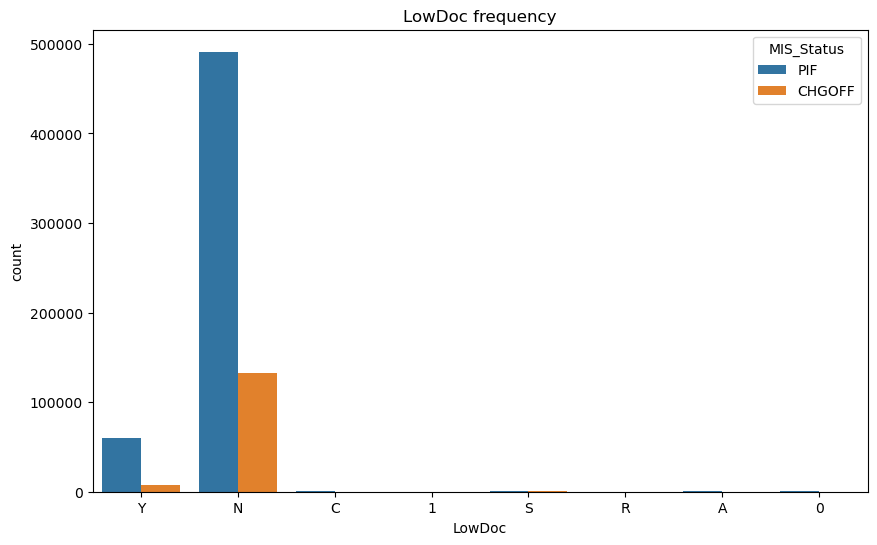

In [22]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='LowDoc', hue='MIS_Status')
plt.title('LowDoc frequency')
plt.show()

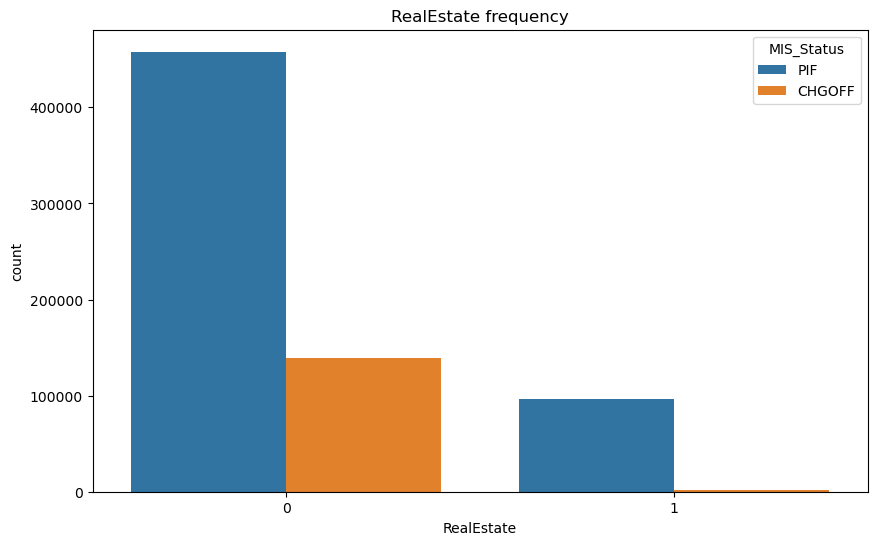

In [23]:
df['RealEstate'] = df['Term'] >= 240
df['RealEstate'] = df['RealEstate'].map({True: 1, False: 0})
df['Portion'] = df['SBA_Appv']/df['GrAppv']

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='RealEstate', hue='MIS_Status')
plt.title('RealEstate frequency')
plt.show()

<Axes: title={'center': 'NoEmp'}, xlabel='MIS_Status'>

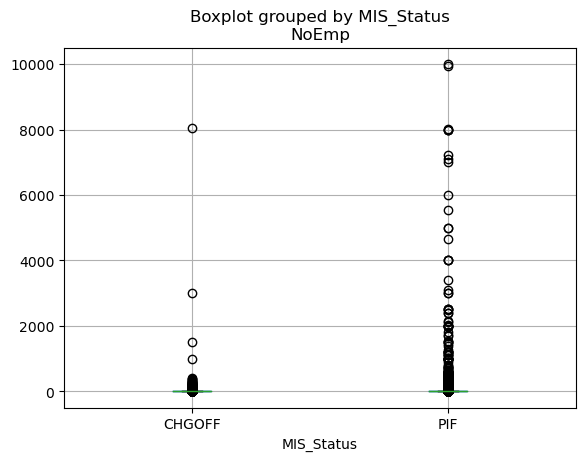

In [24]:
df_test.boxplot(column='NoEmp', by='MIS_Status')

<Figure size 800x600 with 0 Axes>

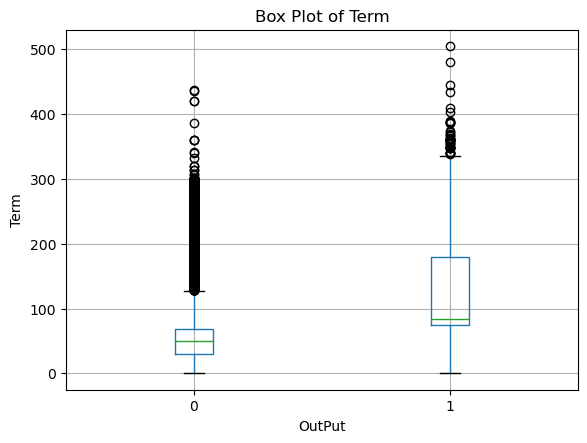

<Figure size 800x600 with 0 Axes>

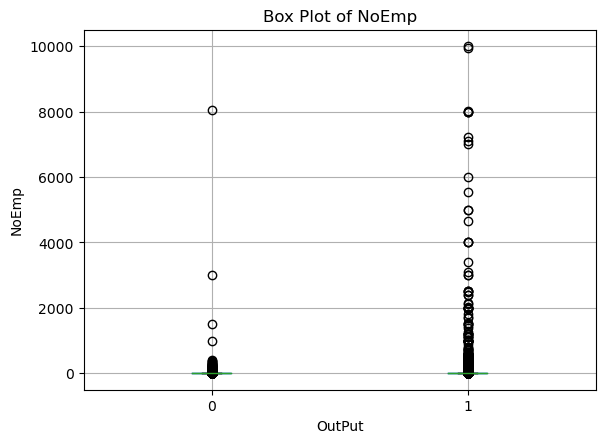

<Figure size 800x600 with 0 Axes>

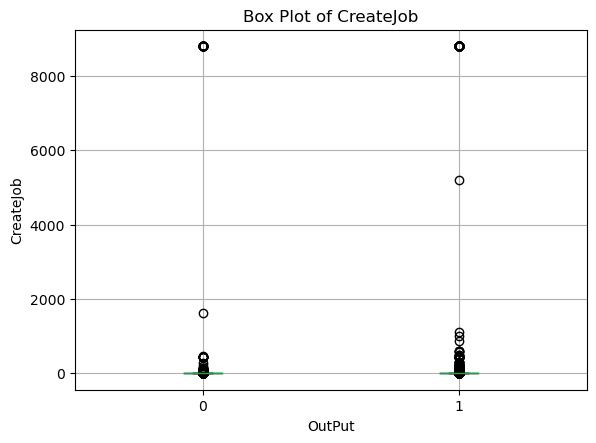

<Figure size 800x600 with 0 Axes>

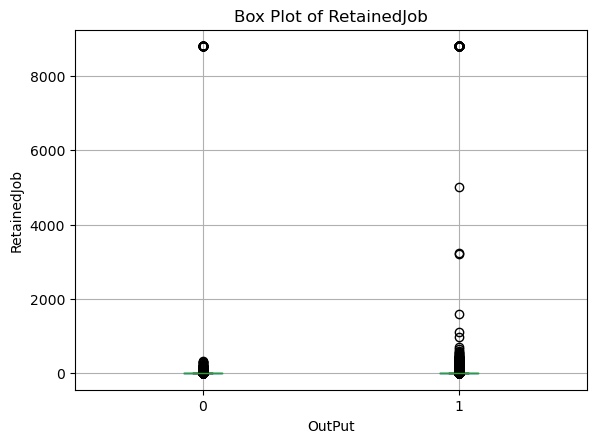

<Figure size 800x600 with 0 Axes>

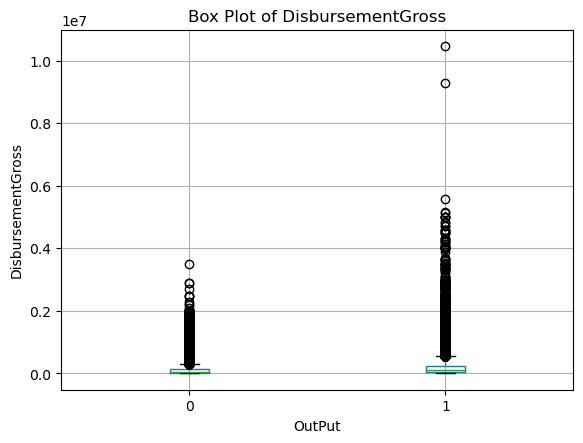

<Figure size 800x600 with 0 Axes>

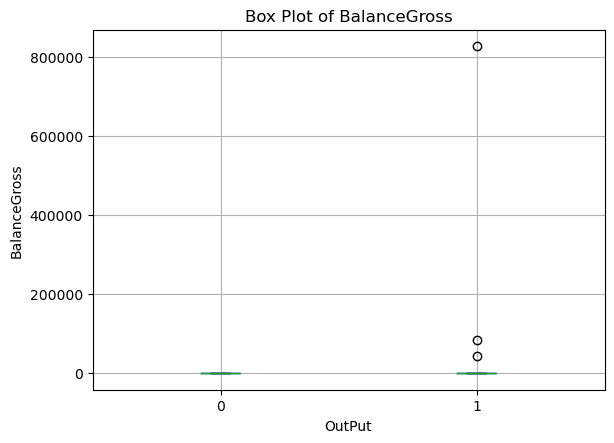

<Figure size 800x600 with 0 Axes>

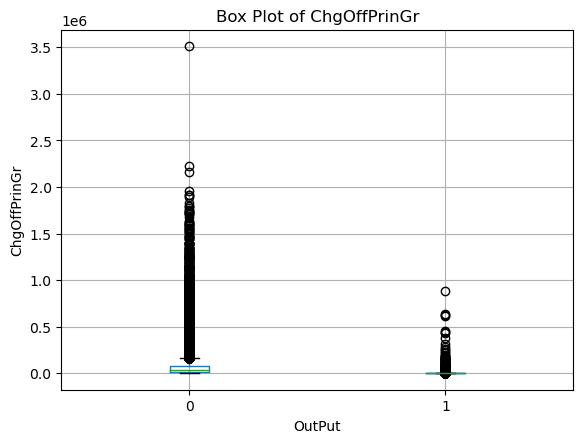

<Figure size 800x600 with 0 Axes>

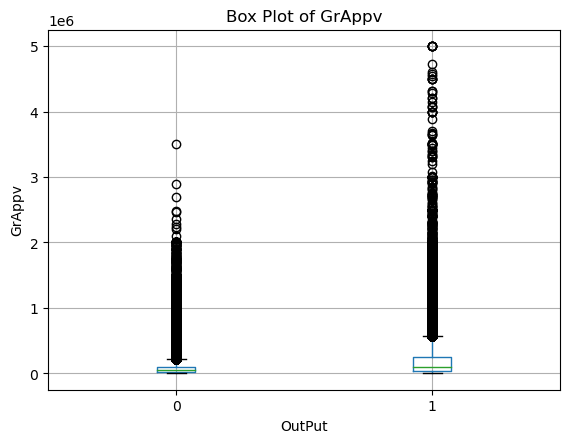

<Figure size 800x600 with 0 Axes>

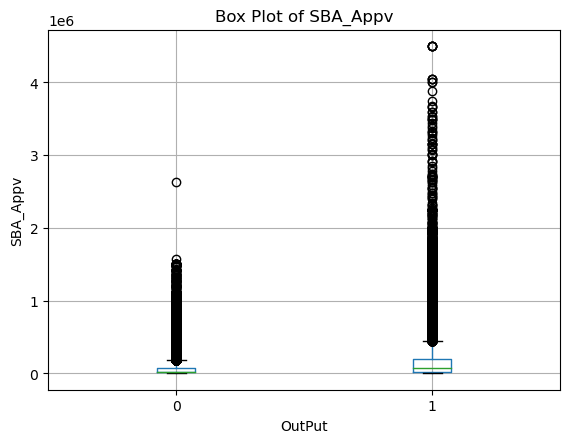

In [25]:
for col in numeric_col:
    df_test = df_test.dropna(subset=col)
    plt.figure(figsize=(8, 6))
    df_test.boxplot(column=col, by='OutPut')
    plt.title(f'Box Plot of {col}')
    plt.suptitle('')  # Remove the default title
    plt.ylabel(col)
    plt.show();

In [26]:
df['UrbanRural'].unique()

array([0, 1, 2])

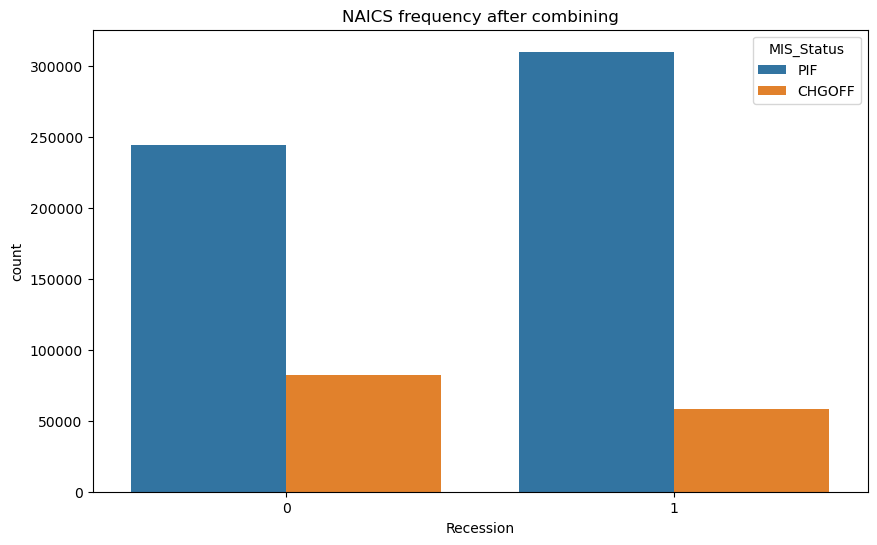

In [27]:
df['ToDate'] = df['DisbursementDate'] + pd.to_timedelta(df['Term']*30, unit='D')
df['Recession'] = (df['DisbursementDate'] < '2007-12-01') & ( df['ToDate'] >= '2009-06-30')
df['Recession'] = df['Recession'].map({True: 1, False: 0})

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Recession', hue='MIS_Status')
plt.title('NAICS frequency after combining')
plt.show()

In [28]:
# Correlation between Numerical and Categorical
correlation, p_value = stats.pointbiserialr(df['OutPut'], df['RealEstate']*df['Portion'])

print(f"Point-biserial correlation: {correlation:.2f}")
print(f"P-value: {p_value:.4f}")



Point-biserial correlation: 0.19
P-value: 0.0000


In [29]:
# Correlation between categorical and categorical

contingency_table = pd.crosstab(df['MIS_Status'], df['NoEmp'])

# Calculate Cramer's V
chi2, _, _, _ = stats.chi2_contingency(contingency_table)
n = np.sum(contingency_table)
min_dim = min(contingency_table.shape)
cramer_v = np.sqrt(chi2 / (n * (min_dim - 1)))

print(f"Cramer's V: {cramer_v}")

Cramer's V: NoEmp
0         1.262204
1         0.283989
2         0.302298
3         0.379349
4         0.426364
           ...    
8000     72.595957
8041    102.666187
9000    102.666187
9992    102.666187
9999    102.666187
Length: 501, dtype: float64


In [30]:
df['NewExist'] >= 2

0          True
1          True
2         False
5         False
7          True
          ...  
899156    False
899157    False
899159    False
899160    False
899161    False
Name: NewExist, Length: 695500, dtype: bool

In [31]:
df['NewExist'] = df.apply(lambda row: 2 if pd.isna(row['NewExist']) and row['MIS_Status'] == 'PIF' else row['NewExist'], axis=1)
df['NewExist'] = df.apply(lambda row: 1 if pd.isna(row['NewExist']) and row['MIS_Status'] == 'CHGOFF' else row['NewExist'], axis=1)